# INFO371 Lab: k-Nearest Neighbors

This lab asks you to:

* use $k$-nearest neighbors to categorize iris data
* use Cross-Validation to find the best metric and $k$

For hints about how to use cross-validation in python, see the following [tutorial](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85).

---
## Categorize Iris Flowers

Your main task is to categorize Iris flowers based on the four measurements (aka: features) into the correct species (aka: labels) setosa, virginica, and versicolor.  The data contains 50 flowers of each species (150 in total), and four measurements for each species (petal length and width, and sepal length and width).  All of these are numeric measures. 

Here are the different iris flowers with the features (sepal and petals marked):
![dataset description](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)


1. Download data the dataset from this [link](https://archive.ics.uci.edu/ml/datasets/Iris).  Make a consistency check to ensure it is loaded correctly. 
2. Split your data into a feature dataframe that only contains the attributes (i.e. the sepal and petal width and length), and the labels array that contains the species name. 
3. Graphical exploration.  Make a few scatterplots of the data using different attributes on axes, while depicting the species with different colors.

      Note: sklearn's implementaiton of $k$-means can easily handle string labels (like species' names) but plotting cannot.  If you are using matplotlib for plotting, it is useful to convert the string labels into numbers (for example, convert "setosa" to 1). You can also use the Seaborn library for plotting which has built in features to handle string data already. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#this code is another option for getting access to the dataset:

#1
from sklearn import datasets
iris = datasets.load_iris()

print(np.isnan(iris['data']).sum())
print(iris['data'].shape)
print()
print(np.isnan(iris['target']).sum())
print(iris['target'].shape)
print()

#2

features = pd.DataFrame(iris['data'])
features = features.rename({0: 's_length', 1: 's_width', 2: 'p_length', 3: 'p_width'}, axis='columns')
target = pd.DataFrame(iris['target'])
target = target.rename({0: 'species'}, axis='columns')
print(features)
print()
print(target)
#in this version, iris['data'] returns the dataframe for the features
# iris['target'] returns the labels where 0 is 'setosa', 1 is 'versicolor', and 2 is 'virginica'

#otherwise, you'll need to download the dataset from this link: https://archive.ics.uci.edu/ml/datasets/Iris

0
(150, 4)

0
(150,)

     s_length  s_width  p_length  p_width
0         5.1      3.5       1.4      0.2
1         4.9      3.0       1.4      0.2
2         4.7      3.2       1.3      0.2
3         4.6      3.1       1.5      0.2
4         5.0      3.6       1.4      0.2
..        ...      ...       ...      ...
145       6.7      3.0       5.2      2.3
146       6.3      2.5       5.0      1.9
147       6.5      3.0       5.2      2.0
148       6.2      3.4       5.4      2.3
149       5.9      3.0       5.1      1.8

[150 rows x 4 columns]

     species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


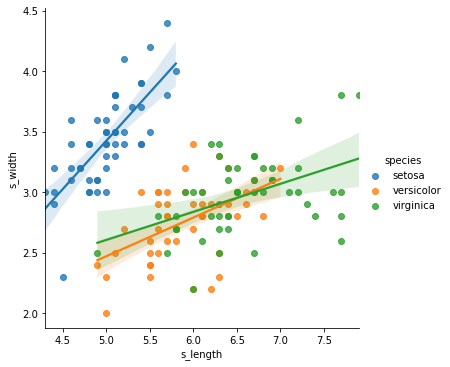

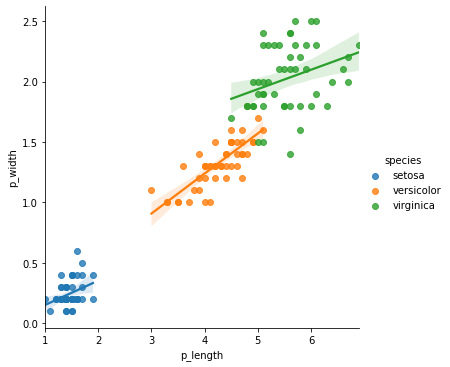

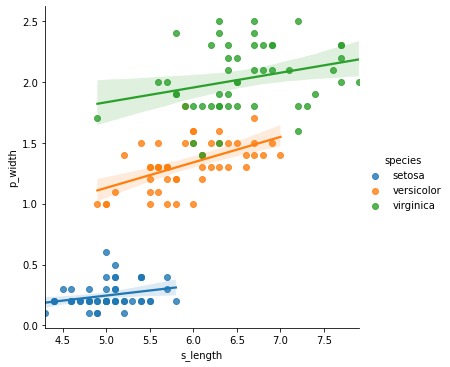

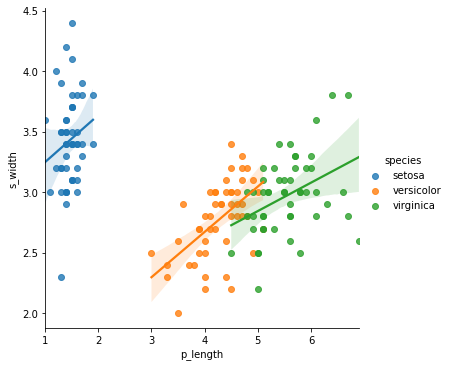

In [3]:
#3
df = features
df["species"] = target
df["species"] = np.where(df["species"] == 0, "setosa", np.where(df["species"] == 1, "versicolor", "virginica"))

sns.lmplot(x="s_length", y="s_width", data=df, hue='species')
sns.lmplot(x="p_length", y="p_width", data=df, hue='species')
sns.lmplot(x="s_length", y="p_width", data=df, hue='species')
sns.lmplot(x="p_length", y="s_width", data=df, hue='species')

Now it is time to get into $k$-NN.  Your task is to predict and cross-validate a series of models over a range of $k$ values, and using four different metrics: Euclidean, Manhattan, Chebyshev and Mahalanobis. Note, you may find it helpful to check out sklearn's [documentation on disntace metrics](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html) to get an idea of what each one does. 


4. Using the sklearn library, create a $k$-NN model using a single neighbor and Euclidean metric. 

5. Cross-validate (10-fold) the model using your feature set and labels.  Use accuracy as your score.  As a reminder, you'll need code like

```
cv = cross_val_score(m, X, y, cv=10)
np.mean(cv)
```

6. Repeat the steps you did with Manhattan, Chebyshev, and Mahalanobis metric.  

    Note: For the latter, you need to compute the data covariance matrix, and thereafter you have to create a $k$-NN model requesting Mahalanobis distance with that metric.  This can be done like so: 

```
Sigma = np.cov(X, rowvar=False)
m = KNeighborsClassifier(n_neighbors=3,
                         metric="mahalanobis",
                         metric_params={"V":Sigma})
```

7. Now repeat the above for $k=1,2,\dots,15$.  Each time print out the cross-validated accuracy score.  Which $k$ and which metric gives you the best accuracy? Why do you think that is the case -- explain your reasoning. Is there a difference distance metric you think would work better? 

In [4]:
#code goes here
#4
features = features.drop('species', axis=1)
m = KNeighborsClassifier(metric = "euclidean", n_neighbors = 1)
m.fit(features, target.values.ravel())

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [5]:
#5
cv = cross_val_score(m, features, target.values.ravel(), cv = 10)
print("Score of Eculidean with k = 1: " + str(np.mean(cv)))

Score of Eculidean with k = 1: 0.96


In [6]:
#6
def model(name, num):
    if (name == "Mahalanobis"):
        Sigma = np.cov(features, rowvar=False)
        m = KNeighborsClassifier(n_neighbors = num,
                                 metric = "mahalanobis",
                                 metric_params = {"V": Sigma})
    else:
        m = KNeighborsClassifier(metric = name.lower(), n_neighbors = num)
    
    m.fit(features, target.values.ravel())
    cv = cross_val_score(m, features, target.values.ravel(), cv = 10)
    print("Score of " + name + " with k = " + str(num)+ ": " +  str(np.mean(cv)))

model('Manhattan', 1)
model('Chebyshev', 1)
model('Mahalanobis', 1)

Score of Manhattan with k = 1: 0.96
Score of Chebyshev with k = 1: 0.9666666666666666
Score of Mahalanobis with k = 1: 0.9


In [7]:
#7
metrics = ["Euclidean", "Manhattan", "Chebyshev", "Mahalanobis"]

for i in range(0, 4):
    for k in range(1, 16):
        model(metrics[i], k)
    print()

Score of Euclidean with k = 1: 0.96
Score of Euclidean with k = 2: 0.9533333333333334
Score of Euclidean with k = 3: 0.9666666666666666
Score of Euclidean with k = 4: 0.9666666666666666
Score of Euclidean with k = 5: 0.9666666666666668
Score of Euclidean with k = 6: 0.9666666666666668
Score of Euclidean with k = 7: 0.9666666666666668
Score of Euclidean with k = 8: 0.9666666666666668
Score of Euclidean with k = 9: 0.9733333333333334
Score of Euclidean with k = 10: 0.9666666666666668
Score of Euclidean with k = 11: 0.9666666666666668
Score of Euclidean with k = 12: 0.9733333333333334
Score of Euclidean with k = 13: 0.9800000000000001
Score of Euclidean with k = 14: 0.9733333333333334
Score of Euclidean with k = 15: 0.9733333333333334

Score of Manhattan with k = 1: 0.96
Score of Manhattan with k = 2: 0.9400000000000001
Score of Manhattan with k = 3: 0.96
Score of Manhattan with k = 4: 0.9533333333333334
Score of Manhattan with k = 5: 0.9666666666666668
Score of Manhattan with k = 6: 0.94

Euclidean with k = 13, Chebyshev with k = 7, and Chebyshev with k = 9 generate the best accuracy - 0.9800000000000001. This is because Euclidean measures the shortest distances between two vectors, while Chebyshev measures the largest differences between them. When using a higher value of k, the nearest k neighbors are considered, resulting in improved accuracy compared to the other methods. I think that increasing the value of k in the Manhattan metric can also lead to improved accuracy as it calculates the distance between real-valued vectors.